<a href="https://colab.research.google.com/github/pnphannisa/thaimaimee/blob/master/codebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ThaiME Codebook Prelim Approved Version

This is an updated version of `thaimaimee` dataset done on 2020-07-03.

In [0]:
#download and installs for colab
!npx degit pnphannisa/thaimaimee -f
!pip install fuzzywuzzy python-Levenshtein -q
!pip install pythainlp -q

npx: installed 1 in 1.176s
> destination directory is not empty. Using --force, continuing
> cloned pnphannisa/thaimaimee#master


In [8]:
import numpy as np
import pandas as pd
import requests
import tqdm
from bs4 import BeautifulSoup
from fuzzywuzzy import fuzz
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', -1)

def check_missing(df):
    per_missing = df.isnull().mean()
    missing_df = pd.DataFrame({'col': df.columns, 'per_missing': per_missing})
    missing_df = missing_df.sort_values('per_missing',ascending=False).reset_index(drop=True)
    missing_df['col'] = pd.Categorical(missing_df.col, categories=missing_df.col, ordered=True)
    return missing_df

In [9]:
# #from https://gist.github.com/korakot/01d181229b21411b0a20784e0ca20d3d
# !wget https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
# !pip install -U --pre matplotlib  
import matplotlib.font_manager as matfont
matfont.fontManager.addfont('thsarabunnew-webfont.ttf.1') # 3.2+
from plotnine import *
from mizani import *
theme_set(theme_minimal(14, 'TH Sarabun New'))

In [0]:
# #for mac
# import matplotlib
# matplotlib.rc('font', family='Ayuthaya')

## Download Prelim Approved Projects

We downloaded all 196 **prelim approved** projects on [thaime](http://nscr.nesdb.go.th/thaime-project/) as of 2020-07-03.

In [25]:
chunk = 0
url = f'http://nscr.nesdb.go.th/wp-admin/admin-ajax.php?action=wp_ajax_ninja_tables_public_action&table_id=13265&target_action=get-all-data&default_sorting=old_first&skip_rows=0&limit_rows=0&chunk_number={chunk}'
with requests.get(url) as r:
    content = eval(r.content)
rows = [i['value'] for i in content]
thaime = pd.DataFrame(rows)
thaime.columns = ['plan_nb', 'purpose','activity','project_name','budget','unit','status','id']
thaime.to_csv('data/thaime_raw_prelim.csv',index=False)

In [26]:
thaime

,plan_nb,purpose,activity,project_name,budget,unit,status,id
0,3.2,1. แผนงานที่มีวัตถุประสงค์เพื่อสร้างความเข้มแข็งเศรษฐกิจฐานราก,เกษตรทฤษฎีใหม่ เพื่อให้พึ่งพาตนเอง,โครงการพัฒนาพื้นที่ต้นแบบการพัฒนาคุณภาพชีวิตตามหลักทฤษฎีใหม่ประยุกต์สู่ “โคก หนอง นา โมเดล”,"4,787,920,000",กรมการพัฒนาชุมชน กระทรวงมหาดไทย,เห็นชอบในหลักการการดำเนินโครงการ \/ ให้รับข้อคิดเห็นและข้อเสนอแนะไปปรับปรุงข้อเสนอโครงการ,522205
1,3.2,1. แผนงานที่มีวัตถุประสงค์เพื่อสร้างความเข้มแข็งเศรษฐกิจฐานราก,เกษตรทฤษฎีใหม่ เพื่อให้พึ่งพาตนเอง,โครงการ 1 ตำบล 1 กลุ่มเกษตรทฤษฎีใหม่,"9,805,710,000",กระทรวงเกษตรและสหกรณ์,เห็นชอบในหลักการการดำเนินโครงการ \/ ให้รับข้อคิดเห็นและข้อเสนอแนะไปปรับปรุงข้อเสนอโครงการ,522206
2,3.2,1. แผนงานที่มีวัตถุประสงค์เพื่อสร้างความเข้มแข็งเศรษฐกิจฐานราก,เกษตรทฤษฎีใหม่ เพื่อให้พึ่งพาตนเอง,พัฒนาเพิ่มศักยภาพมัลเบอรี่วัลเล่ย์,"3,000,000",ศูนย์หม่อนไหมเฉลิมพระเกียรติฯ สระบุรี,เห็นชอบให้ดำเนินการได้,522207
3,3.2,1. แผนงานที่มีวัตถุประสงค์เพื่อสร้างความเข้มแข็งเศรษฐกิจฐานราก,เกษตรทฤษฎีใหม่ เพื่อให้พึ่งพาตนเอง,ส่งเสริมการเลี้ยงสัตว์ปีกแบบยั่งยืน ตามหลักเศรษฐกิจพอเพียง,"7,666,600",สำนักงานปศุสัตว์จังหวัดสิงห์บุรี,เห็นชอบให้ดำเนินการได้,522208
4,3.2,1. แผนงานที่มีวัตถุประสงค์เพื่อสร้างความเข้มแข็งเศรษฐกิจฐานราก,เกษตรทฤษฎีใหม่ เพื่อให้พึ่งพาตนเอง,ส่งเสริมการพัฒนาอาชีพตามแนวปรัชญาเศรษฐกิจพอเพียง,"4,930,000",จังหวัดพระนครศรีอยุธยา(สำนักงานปศุสัตว์จังหวัดพระนครศรีอยุธยา),เห็นชอบให้ดำเนินการได้,522209
...,...,...,...,...,...,...,...,...
191,3.2,2. แผนงานสร้างความเจริญเติบโตอย่างยั่งยืน,เกษตรแปลงใหญ่ และเกษตรสมัยใหม่,โครงการเพิ่มประสิทธิภาพการผลิตสินค้าเกษตรและอุตสาหกรรมที่สำคัญ,"42,902,295",จังหวัดหนองคาย,เห็นชอบให้ดำเนินการได้,522396
192,3.2,1. แผนงานที่มีวัตถุประสงค์เพื่อสร้างความเข้มแข็งเศรษฐกิจฐานราก,การสร้างงาน สร้างอาชีพ,เพิ่มศักยภาพกลุ่มแปรรูปสัตว์น้ำ,"984,280",จังหวัดบึงกาฬ,เห็นชอบให้ดำเนินการได้,522397
193,3.2,1. แผนงานที่มีวัตถุประสงค์เพื่อสร้างความเข้มแข็งเศรษฐกิจฐานราก,การสร้างงาน สร้างอาชีพ,ส่งเสริมการผลิตไข่ไก่คุณภาพจากแม่ไก่อารมณ์ดีสู่ผลิตภัณฑ์อาหารปลอดภัยเพื่อจำหน่ายในตลาดดิจิตอลของสหกรณ์การเกษตรเซกาจำกัด,"3,029,200",จังหวัดบึงกาฬ,เห็นชอบให้ดำเนินการได้,522398
194,3.2,2. แผนงานสร้างความเจริญเติบโตอย่างยั่งยืน,เกษตรแปลงใหญ่ และเกษตรสมัยใหม่,ส่งเสริมการผลิตและการตลาดเกษตรกร,"351,200",จังหวัดบึงกาฬ,เห็นชอบให้ดำเนินการได้,522399


## Clean Data

In [104]:
thaime = pd.read_csv('data/thaime_raw_prelim.csv')
thaime.shape

(196, 8)

In [105]:
def str_to_float(x):
    try:
        return float(x.replace(',',''))
    except:
        return None

#convert to numbers
thaime['budget'] = thaime.budget.map(str_to_float)

In [106]:
#remove text artifacts
for c in ['project_name','unit','purpose','activity','status']:
    #remove \
    thaime[c] = thaime[c].map(lambda x: str(x).strip().replace('\\',''))
    #replace \n with /
    thaime[c] = thaime[c].map(lambda x: str(x).strip().replace('\n','/'))
    #replace nan with None
    thaime[c] = thaime[c].map(lambda x: None if str(x) in ['nan','-','None'] else x)

In [107]:
#handle units
units = pd.DataFrame(thaime.unit.map(lambda x: x if x is not None else x)\
                          .value_counts()).reset_index()
units.columns = ['unit','cnt']
units.head()

,unit,cnt
0,สำนักงานพัฒนาสังคมและความมั่นคงของมนุษย์จังหวัดกาฬสินธุ์,4
1,สำนักงานปศุสัตว์จังหวัดเลย,4
2,สำนักงานพัฒนาวิทยาศาสตร์และเทคโนโลยีแห่งชาติ กระทรวงการอุดมศึกษา วิทยาศาสตร์ วิจัยและนวัตกรรม,4
3,ศูนย์ศึกษาการพัฒนาภูพาน จังหวัดสกลนคร/อันเนื่องมาจากพระราชดำริ,3
4,สำนักงานทรัพยากรธรรมชาติและสิ่งแวดล้อมจังหวัดร้อยเอ็ด,3


In [108]:
#create dictionary of duplicate unit names
unit_dict = {}
for m in units.unit:
    i=0
    for k in unit_dict.keys():
        if fuzz.ratio(m,k)>95:
            i+=1
            unit_dict[k]+=f'|{m}'
    if i==0: unit_dict[m]=m

In [109]:
#replace with corrected name
correct_dict = {}
for k,v in unit_dict.items():
    vs = v.split('|')
    for v_ in vs:
        correct_dict[v_] = k

thaime['unit'] = thaime.unit.map(lambda x: correct_dict[x] if x is not None else x)
thaime.unit.value_counts().head(5)

สำนักงานพัฒนาสังคมและความมั่นคงของมนุษย์จังหวัดกาฬสินธุ์                                         4
สำนักงานปศุสัตว์จังหวัดเลย                                                                       4
สำนักงานพัฒนาวิทยาศาสตร์และเทคโนโลยีแห่งชาติ กระทรวงการอุดมศึกษา วิทยาศาสตร์ วิจัยและนวัตกรรม    4
สำนักงานประมงจังหวัดสิงห์บุรี  สำนักงานสถิติจังหวัดสิงห์บุรี                                     3
สำนักงานทรัพยากรธรรมชาติและสิ่งแวดล้อมจังหวัดร้อยเอ็ด                                            3
Name: unit, dtype: int64

In [110]:
unit_df = pd.DataFrame.from_dict(unit_dict,orient='index').reset_index()
unit_df.columns = ['key','val']
unit_df['nb_val'] = unit_df.val.map(lambda x: len(x.split('|')))
unit_df = unit_df.sort_values('nb_val',ascending=False).reset_index(drop=True)
for i,row in unit_df.head(5).iterrows():
    print(f"Unit name: {row['key']}")
    print(f"Variations: {row['val']}")
    print('-------------------------------------')

Unit name: สำนักงานปลัดกระทรวงการอุดมศึกษา วิทยาศาสตร์และนวัตกรรม กระทรวงการอุดมศึกษา วิทยาศาสตร์ วิจัยและนวัตกรรม
Variations: สำนักงานปลัดกระทรวงการอุดมศึกษา วิทยาศาสตร์และนวัตกรรม กระทรวงการอุดมศึกษา วิทยาศาสตร์ วิจัยและนวัตกรรม|สำนักงานปลัดกระทรวงการอุดมศึกษา วิทยาศาสตร์ วิจัยและนวัตกรรม กระทรวงการอุดมศึกษา วิทยาศาสตร์ วิจัยและนวัตกรรม)
-------------------------------------
Unit name: สำนักงานประมงจังหวัดสิงห์บุรี  สำนักงานสถิติจังหวัดสิงห์บุรี
Variations: สำนักงานประมงจังหวัดสิงห์บุรี  สำนักงานสถิติจังหวัดสิงห์บุรี|สำนักงานประมงจังหวัดสิงห์บุรี สำนักงานสถิติจังหวัดสิงห์บุรี
-------------------------------------
Unit name: สำนักงานพัฒนาสังคมและความมั่นคงของมนุษย์จังหวัดกาฬสินธุ์
Variations: สำนักงานพัฒนาสังคมและความมั่นคงของมนุษย์จังหวัดกาฬสินธุ์
-------------------------------------
Unit name: สำนักงานพัฒนาชุมชนจังหวัดประจวบคีรีขันธ์
Variations: สำนักงานพัฒนาชุมชนจังหวัดประจวบคีรีขันธ์
-------------------------------------
Unit name: สนง.ประมงจังหวัดตราด/สนง.เกษตรจังหวัดตราด/สนง.ปศ

In [111]:
thaime.status.value_counts()

เห็นชอบให้ดำเนินการได้                                                                      157
อยู่ระหว่างการพิจารณากลั่นกรอง                                                              23 
เห็นชอบในหลักการการดำเนินโครงการ / ให้รับข้อคิดเห็นและข้อเสนอแนะไปปรับปรุงข้อเสนอโครงการ    9  
เห็นควรให้ดำเนินการได้                                                                      2  
อยู่ระหว่างพิจารณาของคณะทำงาน                                                               1  
อยู่ระหว่างการพิจารณาของคณะทำงาน                                                            1  
ครม. มีมติอนุมัติ                                                                           1  
เห็นชอบในหลักการการดำเนินโครงการ                                                            1  
เห็นควรให้ทบทวนการดำเนินโครงการ                                                             1  
Name: status, dtype: int64

In [112]:
#our guesswork as in what each means
status_dict = {'เห็นชอบให้ดำเนินการได้':'accepted','เห็นควรให้ดำเนินการได้':'accepted','ครม. มีมติอนุมัติ':'accepted',
               'อยู่ระหว่างการพิจารณากลั่นกรอง':'considering','อยู่ระหว่างพิจารณาของคณะทำงาน':'considering',
               'อยู่ระหว่างการพิจารณาของคณะทำงาน':'considering',
               'เห็นชอบในหลักการการดำเนินโครงการ / ให้รับข้อคิดเห็นและข้อเสนอแนะไปปรับปรุงข้อเสนอโครงการ':'revision',
               'เห็นชอบในหลักการการดำเนินโครงการ':'revision','เห็นควรให้ทบทวนการดำเนินโครงการ':'rejected'}
thaime['status'] = thaime.status.map(lambda x: status_dict[x])
thaime.status.value_counts()

accepted       160
considering    25 
revision       10 
rejected       1  
Name: status, dtype: int64

In [113]:
# thaime.to_csv('data/thaimaimee_prelim.csv',index=False)

## Explore

In [114]:
thaime = pd.read_csv('data/thaimaimee_prelim.csv')
thaime['budget_g'] = thaime.budget/1e9
thaime.head()

,plan_nb,purpose,activity,project_name,budget,unit,status,id,budget_g
0,3.2,1. แผนงานที่มีวัตถุประสงค์เพื่อสร้างความเข้มแข็งเศรษฐกิจฐานราก,เกษตรทฤษฎีใหม่ เพื่อให้พึ่งพาตนเอง,โครงการพัฒนาพื้นที่ต้นแบบการพัฒนาคุณภาพชีวิตตามหลักทฤษฎีใหม่ประยุกต์สู่ “โคก หนอง นา โมเดล”,4.787920e+09,กรมการพัฒนาชุมชน กระทรวงมหาดไทย,revision,522205,4.787920
1,3.2,1. แผนงานที่มีวัตถุประสงค์เพื่อสร้างความเข้มแข็งเศรษฐกิจฐานราก,เกษตรทฤษฎีใหม่ เพื่อให้พึ่งพาตนเอง,โครงการ 1 ตำบล 1 กลุ่มเกษตรทฤษฎีใหม่,9.805710e+09,กระทรวงเกษตรและสหกรณ์,revision,522206,9.805710
2,3.2,1. แผนงานที่มีวัตถุประสงค์เพื่อสร้างความเข้มแข็งเศรษฐกิจฐานราก,เกษตรทฤษฎีใหม่ เพื่อให้พึ่งพาตนเอง,พัฒนาเพิ่มศักยภาพมัลเบอรี่วัลเล่ย์,3.000000e+06,ศูนย์หม่อนไหมเฉลิมพระเกียรติฯ สระบุรี,accepted,522207,0.003000
3,3.2,1. แผนงานที่มีวัตถุประสงค์เพื่อสร้างความเข้มแข็งเศรษฐกิจฐานราก,เกษตรทฤษฎีใหม่ เพื่อให้พึ่งพาตนเอง,ส่งเสริมการเลี้ยงสัตว์ปีกแบบยั่งยืน ตามหลักเศรษฐกิจพอเพียง,7.666600e+06,สำนักงานปศุสัตว์จังหวัดสิงห์บุรี,accepted,522208,0.007667
4,3.2,1. แผนงานที่มีวัตถุประสงค์เพื่อสร้างความเข้มแข็งเศรษฐกิจฐานราก,เกษตรทฤษฎีใหม่ เพื่อให้พึ่งพาตนเอง,ส่งเสริมการพัฒนาอาชีพตามแนวปรัชญาเศรษฐกิจพอเพียง,4.930000e+06,จังหวัดพระนครศรีอยุธยา(สำนักงานปศุสัตว์จังหวัดพระนครศรีอยุธยา),accepted,522209,0.004930


### Missing Data

In [116]:
#no missing at all
check_missing(thaime)

,col,per_missing
0,plan_nb,0.0
1,purpose,0.0
2,activity,0.0
3,project_name,0.0
4,budget,0.0
5,unit,0.0
6,status,0.0
7,id,0.0
8,budget_g,0.0


### Status

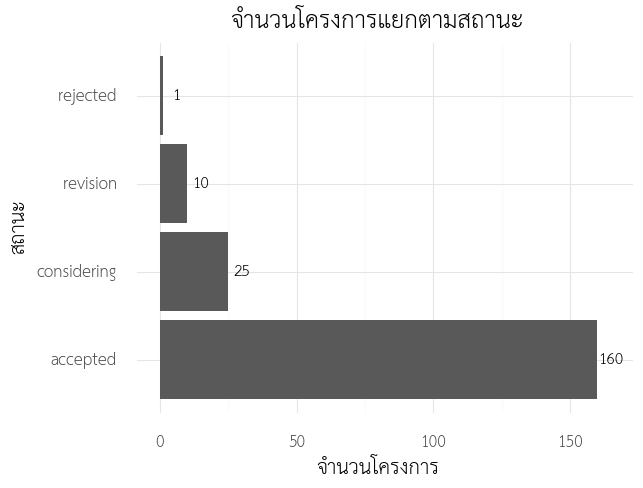

<ggplot: (8733329723866)>

In [122]:
x = pd.DataFrame(thaime.status.value_counts()).reset_index().sort_values('status',ascending=False)
x.columns = ['status','cnt']
x['status'] = pd.Categorical(x.status, categories=x.status,ordered=True)
g = (ggplot(x, aes(x='status',y='cnt')) + geom_col() +
     xlab('สถานะ') + ylab('จำนวนโครงการ') +
     geom_text(aes(x='status',y='cnt+5',label='cnt')) +
     coord_flip() + ggtitle('จำนวนโครงการแยกตามสถานะ'))
g

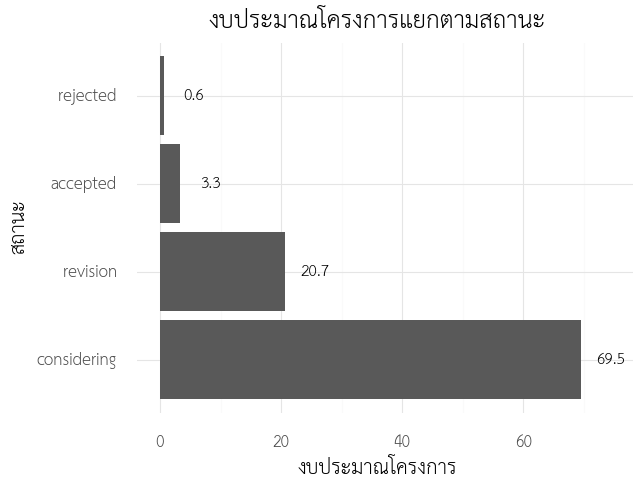

<ggplot: (8733330470941)>

In [127]:
x = thaime.groupby('status').budget_g.sum().reset_index().sort_values('budget_g',ascending=False)
x['status'] = pd.Categorical(x.status, categories=x.status,ordered=True)
g = (ggplot(x, aes(x='status',y='budget_g')) + geom_col() +
     xlab('สถานะ') + ylab('งบประมาณโครงการ') +
     geom_text(aes(x='status',y='budget_g+5',label='round(budget_g,1)')) +
     coord_flip() + ggtitle('งบประมาณโครงการแยกตามสถานะ'))
g

### Purpose

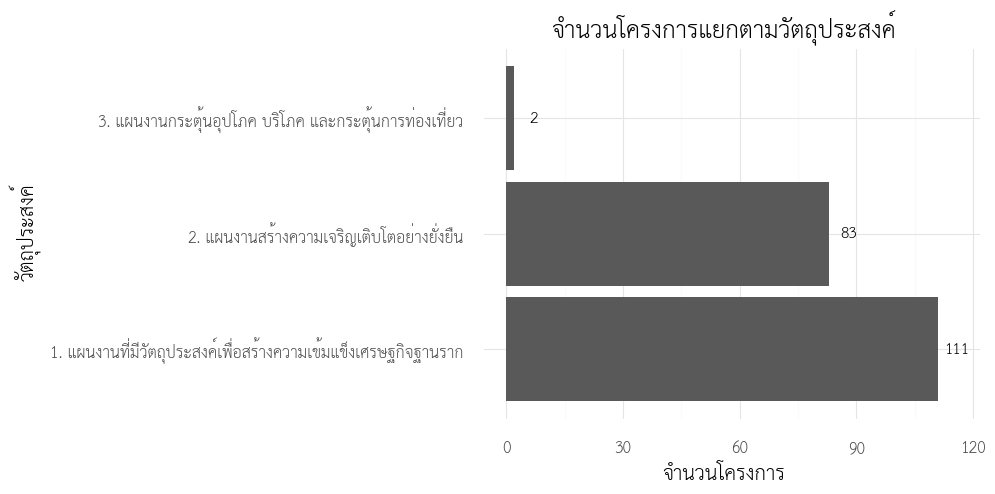

<ggplot: (-9223363303524526718)>

In [152]:
x = pd.DataFrame(thaime.purpose.value_counts()).reset_index().sort_values('purpose',ascending=False)
x.columns = ['purpose','cnt']
x['purpose'] = pd.Categorical(x.purpose, categories=x.purpose,ordered=True)
g = (ggplot(x, aes(x='purpose',y='cnt')) + geom_col() +
     xlab('วัตถุประสงค์') + ylab('จำนวนโครงการ') +
     geom_text(aes(x='purpose',y='cnt+5',label='cnt')) +
     coord_flip() + ggtitle('จำนวนโครงการแยกตามวัตถุประสงค์'))
g

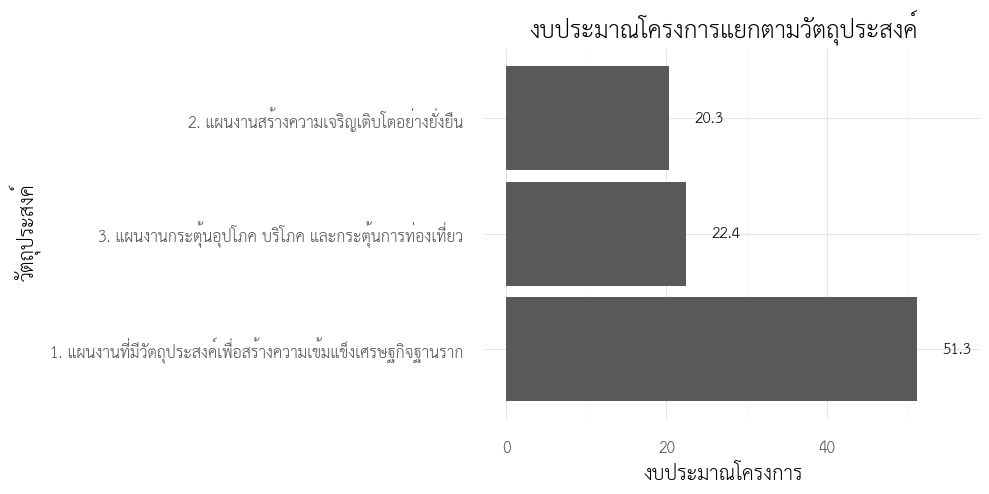

<ggplot: (-9223363303525156776)>

In [138]:
x = thaime.groupby('purpose').budget_g.sum().reset_index().sort_values('budget_g',ascending=False)
x['purpose'] = pd.Categorical(x.purpose, categories=x.purpose,ordered=True)
g = (ggplot(x, aes(x='purpose',y='budget_g')) + geom_col() +
     xlab('วัตถุประสงค์') + ylab('งบประมาณโครงการ') +
     geom_text(aes(x='purpose',y='budget_g+5',label='round(budget_g,1)')) +
     coord_flip() + ggtitle('งบประมาณโครงการแยกตามวัตถุประสงค์'))
g

### Activity

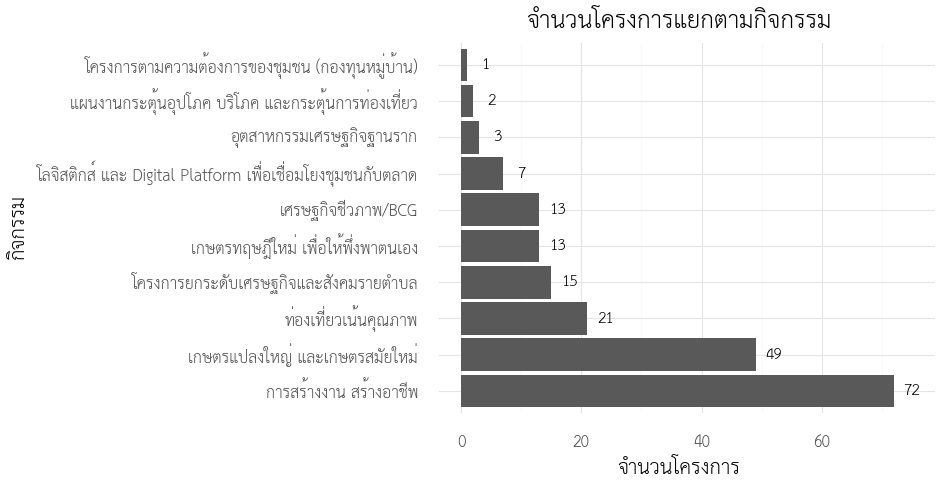

<ggplot: (-9223363303524743757)>

In [149]:
x = pd.DataFrame(thaime.activity.value_counts()).reset_index().sort_values('activity',ascending=False)
x.columns = ['activity','cnt']
x['activity'] = pd.Categorical(x.activity, categories=x.activity,ordered=True)
g = (ggplot(x, aes(x='activity',y='cnt')) + geom_col() +
     xlab('กิจกรรม') + ylab('จำนวนโครงการ') +
     geom_text(aes(x='activity',y='cnt+3',label='cnt')) +
     coord_flip() + ggtitle('จำนวนโครงการแยกตามกิจกรรม'))
g

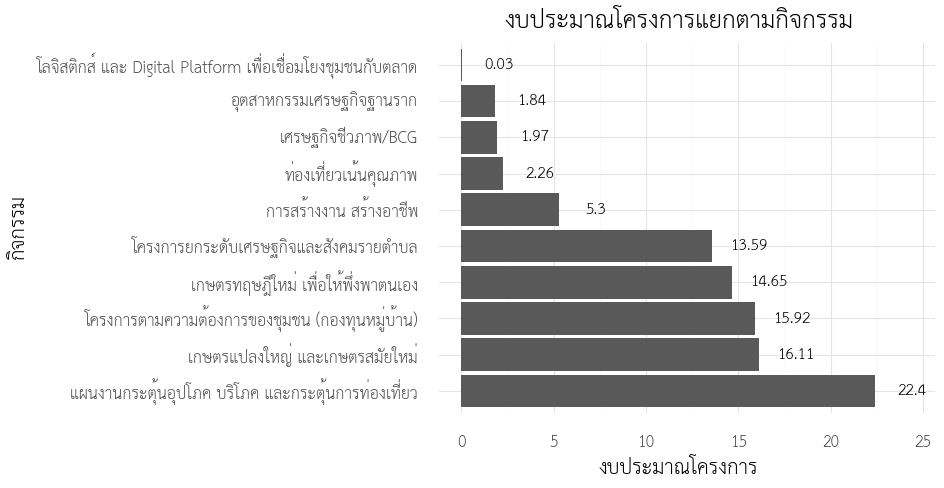

<ggplot: (8733330344084)>

In [151]:
x = thaime.groupby('activity').budget_g.sum().reset_index().sort_values('budget_g',ascending=False)
x['activity'] = pd.Categorical(x.activity, categories=x.activity,ordered=True)
g = (ggplot(x, aes(x='activity',y='budget_g')) + geom_col() +
     xlab('กิจกรรม') + ylab('งบประมาณโครงการ') +
     geom_text(aes(x='activity',y='budget_g+2',label='round(budget_g,2)')) +
     coord_flip() + ggtitle('งบประมาณโครงการแยกตามกิจกรรม'))
g

### Budget Breakdown by Unit

In [129]:
bbm = pd.DataFrame(thaime.groupby('unit').budget_g.sum()).reset_index().\
    sort_values('budget_g',ascending=False).reset_index(drop=True)
bbm['unit_'] = bbm.apply(lambda row: 'อื่นๆ' if row['budget_g']<1 else row['unit'],1)
bbm2 = bbm.groupby('unit_').budget_g.sum().reset_index().sort_values('budget_g',ascending=False).reset_index(drop=True)
bbm2['unit_'] = pd.Categorical(bbm2.unit_, categories=bbm2.unit_,ordered=True)
bbm2

,unit_,budget_g
0,การท่องเที่ยวแห่งประเทศไทย (ททท.) กระทรวงการท่องเที่ยวและกีฬา,22.500000
1,สำนักงานกองทุนหมู่บ้านและชุมชนเมืองแห่งชาติ,15.920800
2,กรมส่งเสริมการเกษตร กระทรวงเกษตรและสหกรณ์,14.765191
3,สำนักงานปลัดกระทรวงการอุดมศึกษา วิทยาศาสตร์และนวัตกรรม กระทรวงการอุดมศึกษา วิทยาศาสตร์ วิจัยและนวัตกรรม,13.509270
4,กระทรวงเกษตรและสหกรณ์,9.805710
5,กรมการพัฒนาชุมชน กระทรวงมหาดไทย,5.398930
6,อื่นๆ,4.317799
7,กรมการปกครอง กระทรวงมหาดไทย,2.701876
8,สำนักงานปลัดกระทรวงอุตสาหกรรม กระทรวงอุตสาหกรรม,1.660000
9,สถาบันวิจัยวิทยาศาสตร์และเทคโนโลยีแห่งประเทศไทย กระทรวงการอุดมศึกษา วิทยาศาสตร์ วิจัยและนวัตกรรม,1.394380


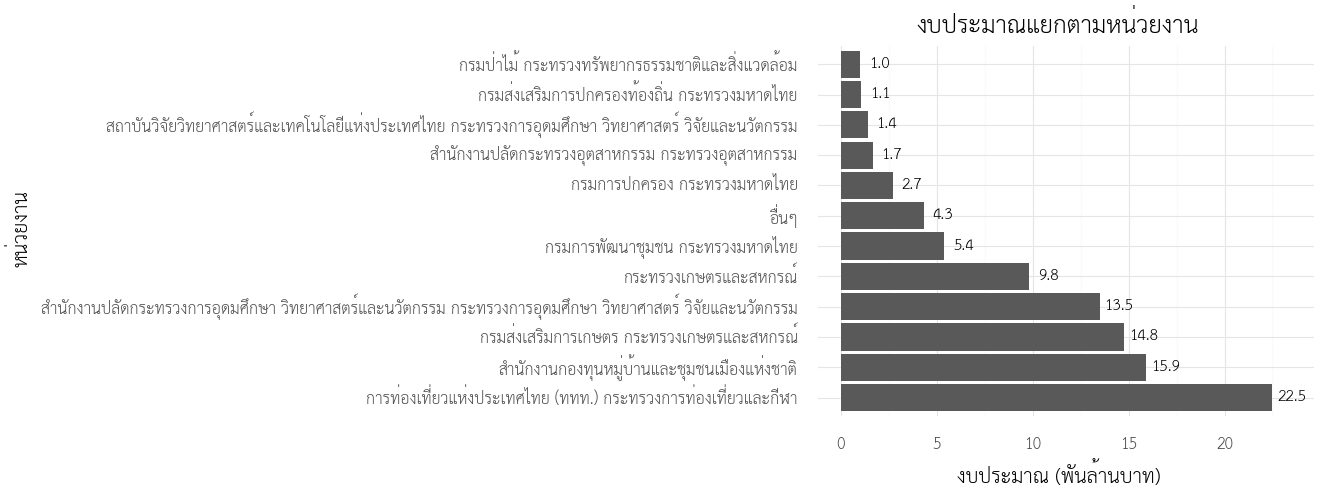

<ggplot: (-9223363303524304696)>

In [130]:
g = (ggplot(bbm2, aes(x='unit_',y='budget_g')) + geom_col() +
     xlab('หน่วยงาน') + ylab('งบประมาณ (พันล้านบาท)') +
     geom_text(aes(x='unit_',y='budget_g+1',label='round(budget_g,1)')) +
     coord_flip() + ggtitle('งบประมาณแยกตามหน่วยงาน'))
g

### Top Projects

In [139]:
bbm = pd.DataFrame(thaime.groupby(['project_name','unit','purpose','status']).budget_g.sum()).reset_index().\
    sort_values('budget_g',ascending=False).reset_index(drop=True).head(10)
bbm

,project_name,unit,purpose,status,budget_g
0,โครงการเราเที่ยวด้วยกัน,การท่องเที่ยวแห่งประเทศไทย (ททท.) กระทรวงการท่องเที่ยวและกีฬา,3. แผนงานกระตุ้นอุปโภค บริโภค และกระตุ้นการท่องเที่ยว,considering,20.000000
1,1.โครงการยกระดับเศรษฐกิจชุมชนด้วยการสร้างงาน สร้างอาชีพและสร้างรายได้ เพื่อบรรเทาผลกระทบทางเศรษฐกิจจากการระบาดของโรคติดเชื้อไวรัสโคโรนา 2019,สำนักงานกองทุนหมู่บ้านและชุมชนเมืองแห่งชาติ,1. แผนงานที่มีวัตถุประสงค์เพื่อสร้างความเข้มแข็งเศรษฐกิจฐานราก,considering,15.920800
2,โครงการยกระดับแปลงใหญ่ด้วยเกษตรสมัยใหม่และเชื่อมโยงตลาด,กรมส่งเสริมการเกษตร กระทรวงเกษตรและสหกรณ์,2. แผนงานสร้างความเจริญเติบโตอย่างยั่งยืน,considering,13.904500
3,โครงการยกระดับเศรษฐกิจและสังคมรายตำบลแบบบูรณาการ (1 ตำบล 1 มหาวิทยาลัย),สำนักงานปลัดกระทรวงการอุดมศึกษา วิทยาศาสตร์และนวัตกรรม กระทรวงการอุดมศึกษา วิทยาศาสตร์ วิจัยและนวัตกรรม,1. แผนงานที่มีวัตถุประสงค์เพื่อสร้างความเข้มแข็งเศรษฐกิจฐานราก,considering,13.500000
4,โครงการ 1 ตำบล 1 กลุ่มเกษตรทฤษฎีใหม่,กระทรวงเกษตรและสหกรณ์,1. แผนงานที่มีวัตถุประสงค์เพื่อสร้างความเข้มแข็งเศรษฐกิจฐานราก,revision,9.805710
5,โครงการพัฒนาพื้นที่ต้นแบบการพัฒนาคุณภาพชีวิตตามหลักทฤษฎีใหม่ประยุกต์สู่ “โคก หนอง นา โมเดล”,กรมการพัฒนาชุมชน กระทรวงมหาดไทย,1. แผนงานที่มีวัตถุประสงค์เพื่อสร้างความเข้มแข็งเศรษฐกิจฐานราก,revision,4.787920
6,โครงการพัฒนาตำบลแบบบูรณาการ,กรมการปกครอง กระทรวงมหาดไทย,1. แผนงานที่มีวัตถุประสงค์เพื่อสร้างความเข้มแข็งเศรษฐกิจฐานราก,revision,2.701876
7,โครงการกำลังใจ,การท่องเที่ยวแห่งประเทศไทย (ททท.) กระทรวงการท่องเที่ยวและกีฬา,3. แผนงานกระตุ้นอุปโภค บริโภค และกระตุ้นการท่องเที่ยว,accepted,2.400000
8,การสร้างผู้ประกอบการที่ขับเคลื่อนด้วยนวัตกรรม - Innovation Driven Enterprise (IDE) จาก SMEs กระทรวงอุดมศึกษา วิทยาศาสตร์ วิจัยและนวัตกรรม,สำนักงานปลัดกระทรวงอุตสาหกรรม กระทรวงอุตสาหกรรม,1. แผนงานที่มีวัตถุประสงค์เพื่อสร้างความเข้มแข็งเศรษฐกิจฐานราก,considering,1.660000
9,ศูนย์นวัตกรรมการผลิตหัวเชื้อจุลินทรีย์เพื่ออุตสาหกรรมการเกษตร อาหารและการแพทย์,สถาบันวิจัยวิทยาศาสตร์และเทคโนโลยีแห่งประเทศไทย กระทรวงการอุดมศึกษา วิทยาศาสตร์ วิจัยและนวัตกรรม,2. แผนงานสร้างความเจริญเติบโตอย่างยั่งยืน,considering,1.264380


### Project Size Distribution

In [58]:
thaime['digits'] = thaime.budget.map(lambda x: len(str(round(x))) if x==x else x)
dg = thaime.groupby('digits').project_name.count().reset_index()
dg

,digits,project_name
0,6,29
1,7,106
2,8,36
3,9,13
4,10,8
5,11,4


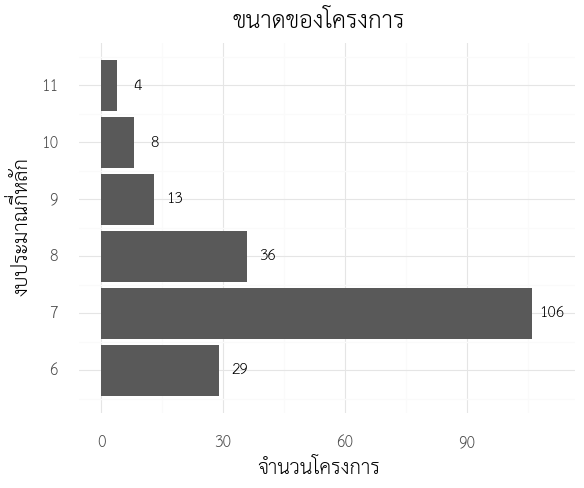

<ggplot: (-9223363303506725993)>

In [64]:
g = (ggplot(dg, aes(x='digits',y='project_name')) + geom_col() +
     xlab('งบประมาณกี่หลัก') + ylab('จำนวนโครงการ') +
     scale_x_continuous(breaks=[i for i in range(13)])+
     geom_text(aes(x='digits',y='project_name+5',label='round(project_name,1)')) +
     coord_flip() + ggtitle('ขนาดของโครงการ'))
g

### Project Name Word Cloud

In [70]:
import pythainlp
from pythainlp.tokenize import word_tokenize
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [71]:
texts = []
for i in range(thaime.shape[0]):
    texts+=[i for i in word_tokenize(thaime.project_name[i], keep_whitespace=False) if len(i)>2]
text = ' '.join(texts)
text[:100]

'โครง การพัฒนา พื้นที่ ต้นแบบ การพัฒนา คุณภาพชีวิต ตาม หลัก ทฤษฎีใหม่ ประยุกต์ สู่ โคก หนอง โมเดล โคร'

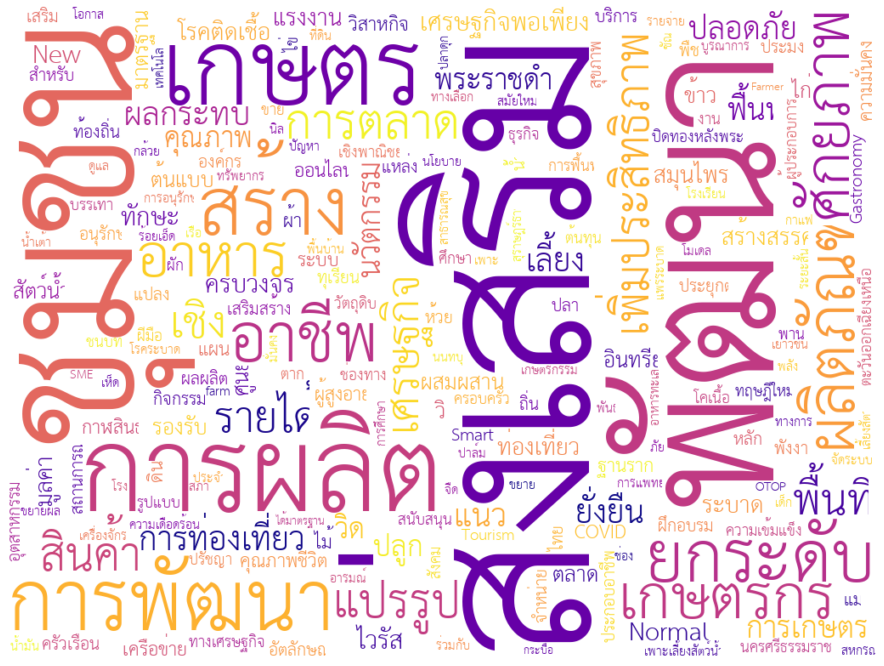

In [72]:
wordcloud = WordCloud(font_path='thsarabunnew-webfont.ttf.1',
                      background_color="white",
                      width=1024,
                      height=768,
                      max_words=200,
                      collocations=False,
                      colormap='plasma',
                      regexp=r"[ก-๙a-zA-Z']+",
                      stopwords=list(pythainlp.corpus.common.thai_stopwords()) + \
                          ['โครงการ','โครง',
                           #units
                          'เมตร','ตารางเมตร','ลบ','ตร','กม',
                           #area
                          'จังหวัด','เขต','อำเภอ','ตำบล','หมู่','บ้าน','เมือง',
                           'หมู่บ้าน','หนอง',
                           #size
                           'ขนาด','จำนวน','ปริมาณ']
                      ).generate(text)

fig, ax = plt.subplots(1, 1, figsize=(16, 12))
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis("off")
fig.show()